In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
path = 'Z:\\Sasindu\\Data set\\Taco Sales\\taco_sales.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)

In [3]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [4]:
df.shape

(1000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


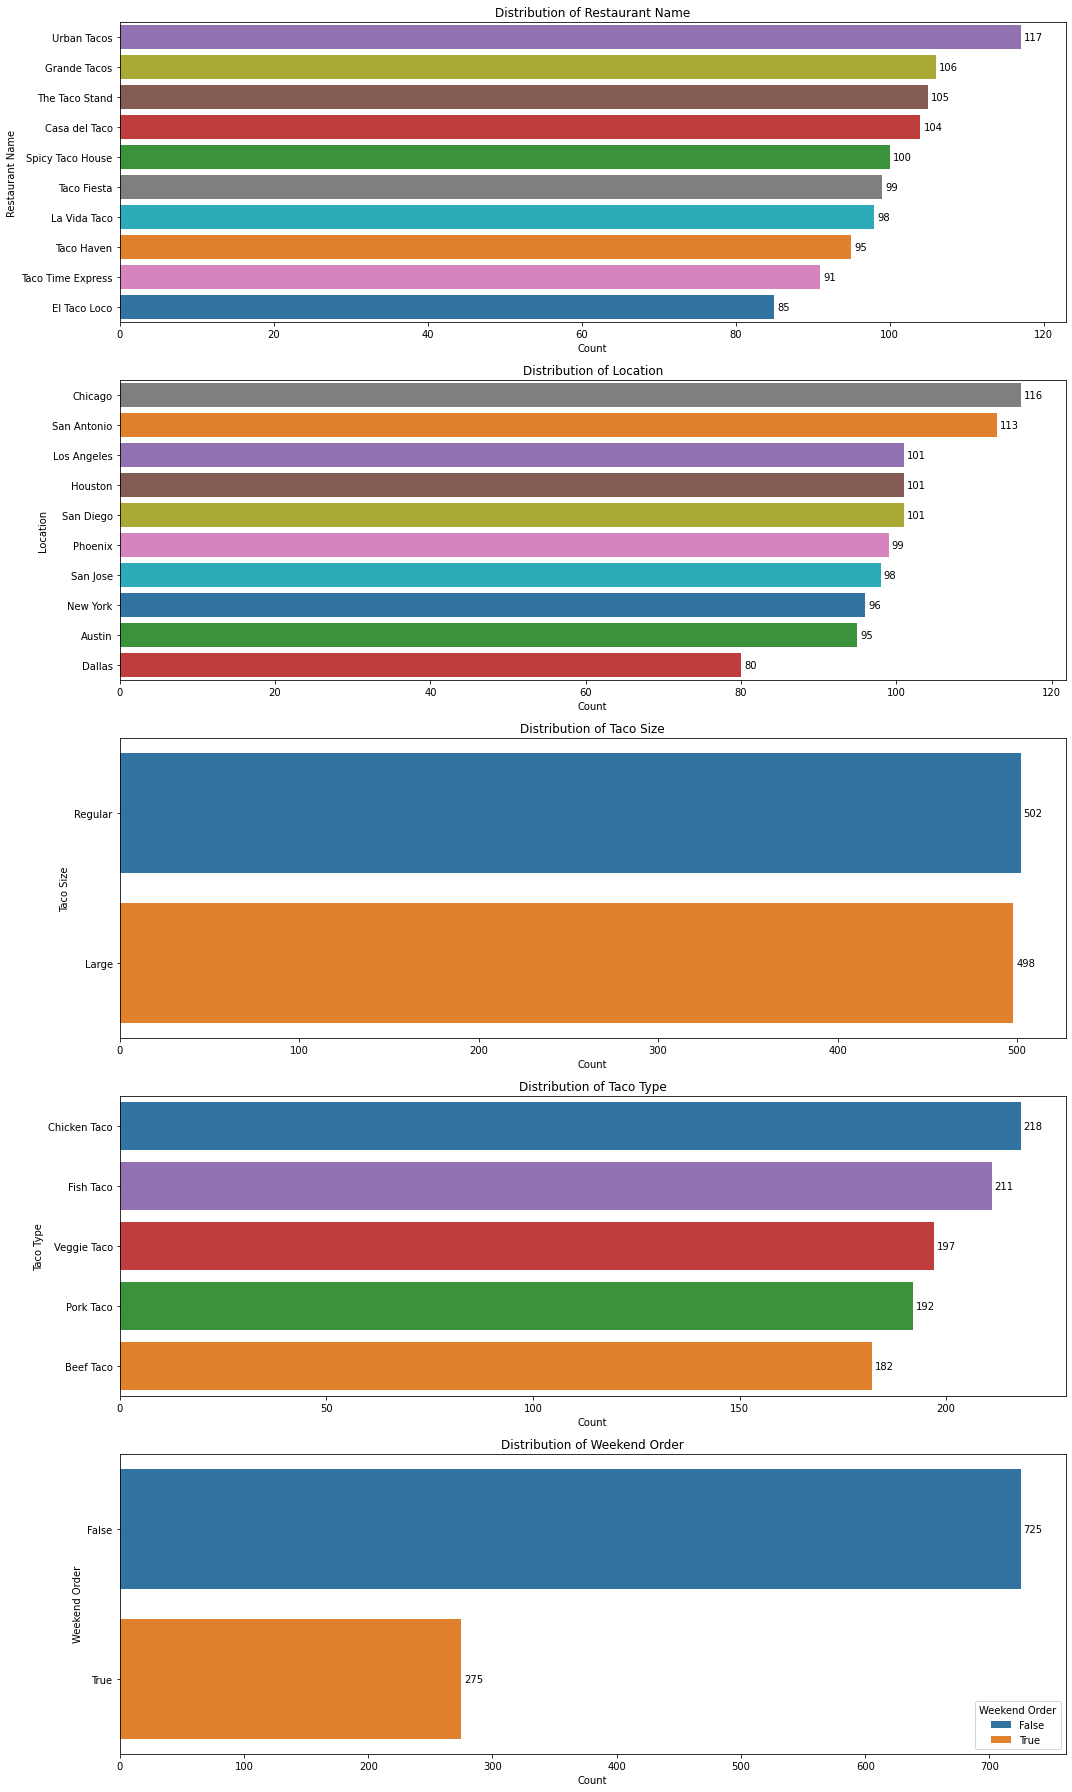

In [6]:
categorical_columns = ['Restaurant Name', 'Location', 'Taco Size', 'Taco Type', 'Weekend Order']

plt.figure(figsize=(15, 25))

for i, column in enumerate(categorical_columns, 1):
    ax = plt.subplot(5, 1, i)
    countplot = sns.countplot(y=column, data=df, order=df[column].value_counts().index, ax=ax, hue = df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

    # Add bar labels
    for container in countplot.containers:
        countplot.bar_label(container, label_type='edge', padding=3)

plt.tight_layout()
plt.show()

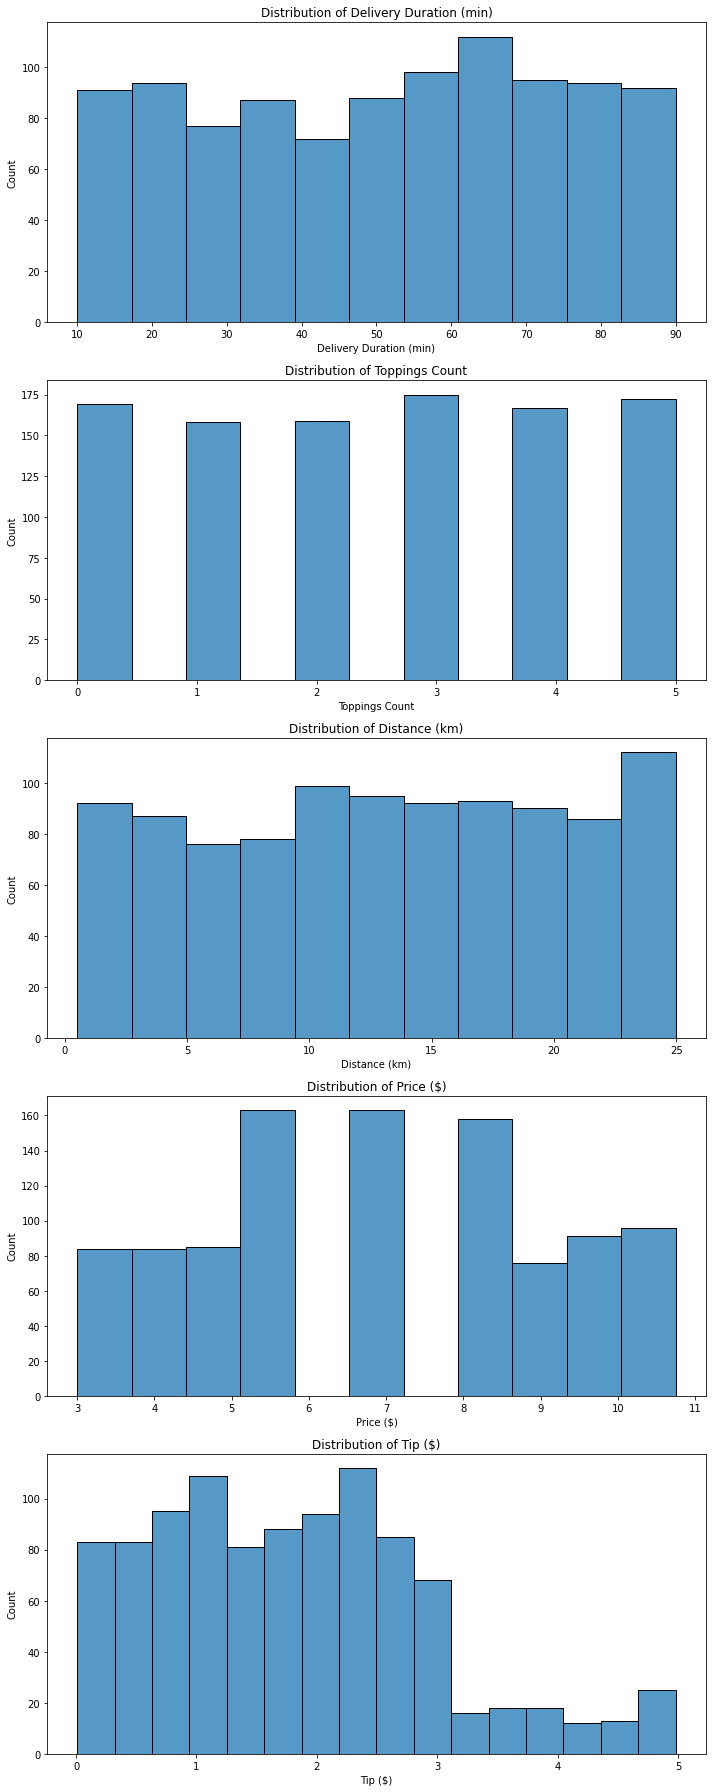

In [7]:
Numerical_columns = ['Delivery Duration (min)', 'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)']
plt.figure(figsize=(10,25))
for  i,column in enumerate(Numerical_columns,1):
    plt.subplot(5,1,i)
    sns.histplot(data = df, x = column)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Count')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [8]:
df.isnull().sum()

Order ID                   0
Restaurant Name            0
Location                   0
Order Time                 0
Delivery Time              0
Delivery Duration (min)    0
Taco Size                  0
Taco Type                  0
Toppings Count             0
Distance (km)              0
Price ($)                  0
Tip ($)                    0
Weekend Order              0
dtype: int64

## Feature Engineering

In [9]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [10]:
df.describe()

,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


### One-hot Encording

In [11]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [12]:
df_encoded.head()

,Order ID,Order Time,Delivery Time,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($),Restaurant Name_El Taco Loco,Restaurant Name_Grande Tacos,...,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose,Taco Size_Regular,Taco Type_Chicken Taco,Taco Type_Fish Taco,Taco Type_Pork Taco,Taco Type_Veggie Taco,Weekend Order_True
0,770487,01-08-2024 14:55,01-08-2024 15:36,41,5,3.01,9.25,2.22,True,False,...,False,False,False,False,True,True,False,False,False,False
1,671858,23-11-2024 17:11,23-11-2024 17:25,14,1,6.20,4.25,3.01,True,False,...,False,True,False,False,True,False,False,False,False,True
2,688508,21-11-2024 20:24,21-11-2024 21:02,38,2,20.33,7.00,0.02,False,False,...,False,False,False,False,False,False,False,True,False,False
3,944962,21-09-2024 06:43,21-09-2024 07:28,45,2,3.00,5.50,1.90,False,False,...,False,False,False,False,True,True,False,False,False,True
4,476417,24-07-2024 11:01,24-07-2024 11:16,15,0,24.34,4.50,1.14,False,False,...,False,True,False,False,False,False,False,True,False,False


In [14]:
df_encoded.columns

Index(['Order ID', 'Order Time', 'Delivery Time', 'Delivery Duration (min)',
       'Toppings Count', 'Distance (km)', 'Price ($)', 'Tip ($)',
       'Restaurant Name_El Taco Loco', 'Restaurant Name_Grande Tacos',
       'Restaurant Name_La Vida Taco', 'Restaurant Name_Spicy Taco House',
       'Restaurant Name_Taco Fiesta', 'Restaurant Name_Taco Haven',
       'Restaurant Name_Taco Time Express', 'Restaurant Name_The Taco Stand',
       'Restaurant Name_Urban Tacos', 'Location_Chicago', 'Location_Dallas',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
       'Location_San Jose', 'Taco Size_Regular', 'Taco Type_Chicken Taco',
       'Taco Type_Fish Taco', 'Taco Type_Pork Taco', 'Taco Type_Veggie Taco',
       'Weekend Order_True'],
      dtype='object')

### Drop Useless columns

In [15]:
df_encoded.drop(columns=['Order ID', 'Order Time','Delivery Time'], inplace=True)

In [16]:
df_encoded.columns

Index(['Delivery Duration (min)', 'Toppings Count', 'Distance (km)',
       'Price ($)', 'Tip ($)', 'Restaurant Name_El Taco Loco',
       'Restaurant Name_Grande Tacos', 'Restaurant Name_La Vida Taco',
       'Restaurant Name_Spicy Taco House', 'Restaurant Name_Taco Fiesta',
       'Restaurant Name_Taco Haven', 'Restaurant Name_Taco Time Express',
       'Restaurant Name_The Taco Stand', 'Restaurant Name_Urban Tacos',
       'Location_Chicago', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York', 'Location_Phoenix',
       'Location_San Antonio', 'Location_San Diego', 'Location_San Jose',
       'Taco Size_Regular', 'Taco Type_Chicken Taco', 'Taco Type_Fish Taco',
       'Taco Type_Pork Taco', 'Taco Type_Veggie Taco', 'Weekend Order_True'],
      dtype='object')

In [19]:
numeric_df = df_encoded.select_dtypes(include = ['number'])
corr_matrix = numeric_df.corr()

In [21]:
print(corr_matrix['Price ($)'].sort_values(ascending = False).to_string())

Price ($)                  1.000000
Toppings Count             0.945928
Tip ($)                    0.059377
Distance (km)              0.031482
Delivery Duration (min)   -0.035233


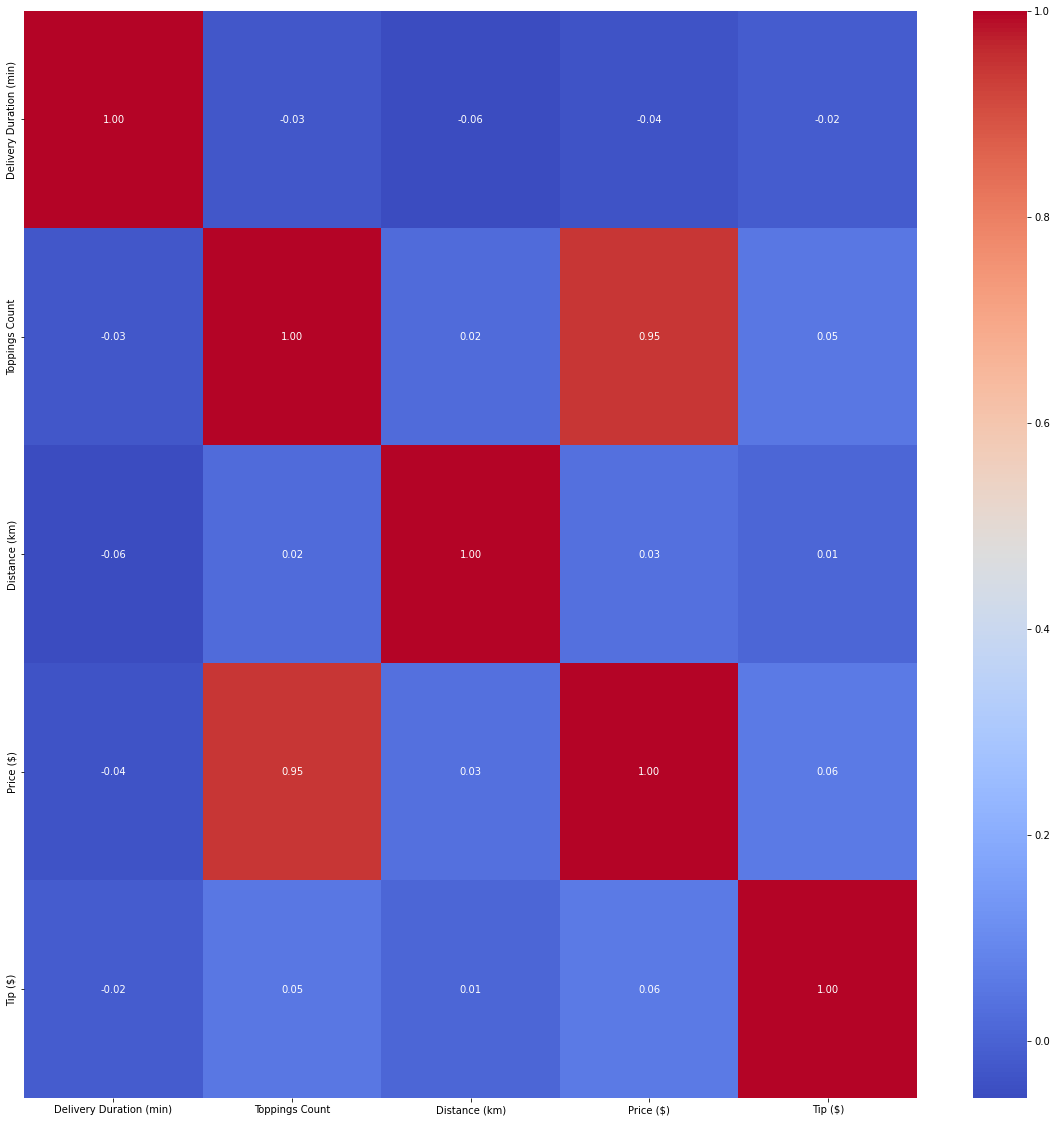

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm', fmt = ".2f")
plt.show()

### Split Data into Train and Test

In [23]:
x = df_encoded.drop(['Price ($)'],axis =1)
y = df_encoded['Price ($)']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

### Apply standard scaler

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sd = StandardScaler()
x_train_scaled = sd.fit_transform(x_train)
x_test_scaled = sd.transform(x_test)

## Deploy Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

C:\Users\Maclan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 5.221649753488963
Mean Squared Error: 29.648983426566836
R² Score: -5.120405704241708


In [35]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})
print(coefficients)

                              Feature   Coefficient
0             Delivery Duration (min)  6.016103e-17
1                      Toppings Count  2.173211e+00
2                       Distance (km) -1.809739e-16
3                             Tip ($)  4.038444e-16
4        Restaurant Name_El Taco Loco -1.097082e-16
5        Restaurant Name_Grande Tacos -3.746557e-16
6        Restaurant Name_La Vida Taco -2.089104e-16
7    Restaurant Name_Spicy Taco House -3.007028e-16
8         Restaurant Name_Taco Fiesta  1.612826e-16
9          Restaurant Name_Taco Haven -2.306520e-16
10  Restaurant Name_Taco Time Express -3.032873e-16
11     Restaurant Name_The Taco Stand -4.715160e-16
12        Restaurant Name_Urban Tacos  6.026384e-16
13                   Location_Chicago  3.584232e-16
14                    Location_Dallas  1.353975e-16
15                   Location_Houston  3.906501e-16
16               Location_Los Angeles  4.129244e-16
17                  Location_New York -1.084202e-16
18          

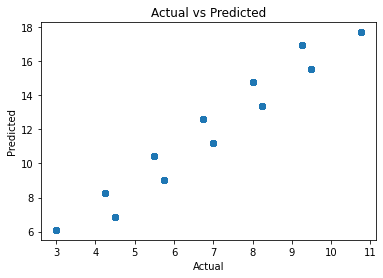

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()